This is an example notebook created to show how the linear regression work

In [86]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

Firstly, we should load data into numpy array, the X data is the inputs of the model and the y is the expected value.
Here, we assign the last column to y and all other column to X.

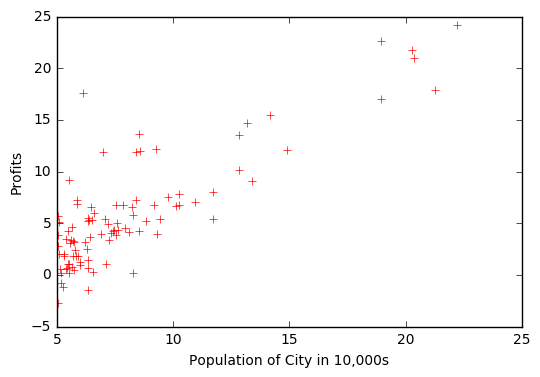

In [87]:
datas = np.loadtxt('ex1data1.txt', delimiter=',')
X = datas[:,:-1]
y = datas[:,-1]
y = y.reshape((-1,1))
plt.plot(X, y, 'r+')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profits')

plt.show()

We need a Loss function to evaluate the performance of our mode

In [88]:
def Loss(X, w, b, y):
    return np.sum((np.dot(X, w) + b - y) ** 2) / (2 * np.shape(X)[0])

print(Loss(X, 0, 0, y))

32.0727338775


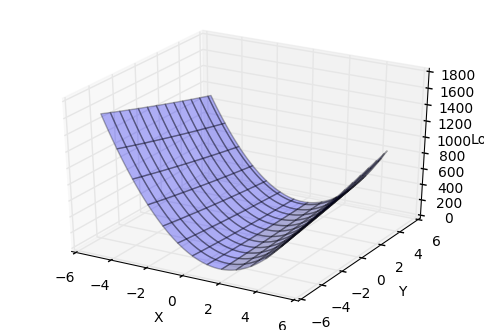

In [104]:

theta = [[[iw, ib] for ib in np.arange(-5, 5, 0.1)] for iw in np.arange(-5, 5, 0.1)]
theta = np.reshape(theta, (10000, -1))
Losses = [ Loss(X, iw, ib, y) for iw, ib in theta]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Loss')
ax.plot_surface(np.reshape(theta[:,0], (100,100)), np.reshape(theta[:,1], (100,100)), np.reshape(Losses, (100,100)), rstride=8, cstride=8, alpha=0.3)
plt.show()


In [90]:
def gradient(X, w, b, y):
    m = np.shape(X)[0]
    db = np.sum((np.dot(X, w) + b - y), 0) / m
    dw = np.dot(X.T, (np.dot(X, w) + b - y)) / m
    return dw, db
dw, db = gradient(X, 0, 0, y)
print(db)
print(dw)

[-5.83913505]
[[-65.32884975]]


In [109]:
w = 5
b = 5
m = np.shape(X)[0]
loop = 100000
steps = np.zeros((loop / 1000, 3))
alpha = 0.001

for i in range(loop):
    loss = Loss(X, w, b, y)
    dw, db = gradient(X, w, b, y)
    w -= alpha * dw
    b -= alpha * db
    if i % 1000 == 0:
        steps[i/1000,:] = [w, b, loss]
        print("%ith step:", i)
        print("The loss it:%f", loss)

print("w:", w)
print("b:", b)

('%ith step:', 0)
('The loss it:%f', 910.27709516771347)
('%ith step:', 1000)
('The loss it:%f', 8.9863903615919885)
('%ith step:', 2000)
('The loss it:%f', 7.6213511341912525)
('%ith step:', 3000)
('The loss it:%f', 6.6695208142542146)
('%ith step:', 4000)
('The loss it:%f', 6.0058175742553308)
('%ith step:', 5000)
('The loss it:%f', 5.5430229126877633)
('%ith step:', 6000)
('The loss it:%f', 5.2203201053671275)
('%ith step:', 7000)
('The loss it:%f', 4.9953021643651967)
('%ith step:', 8000)
('The loss it:%f', 4.8383990552997735)
('%ith step:', 9000)
('The loss it:%f', 4.7289918430358187)
('%ith step:', 10000)
('The loss it:%f', 4.6527031183147622)
('%ith step:', 11000)
('The loss it:%f', 4.5995076351365238)
('%ith step:', 12000)
('The loss it:%f', 4.5624148741693809)
('%ith step:', 13000)
('The loss it:%f', 4.5365504053468024)
('%ith step:', 14000)
('The loss it:%f', 4.5185153297678573)
('%ith step:', 15000)
('The loss it:%f', 4.5059396239465057)
('%ith step:', 16000)
('The loss it:%

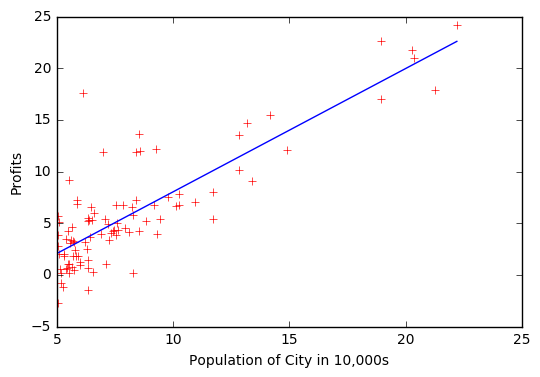

In [110]:
plt.plot(X, y, 'r+')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profits')
xmin = np.min(X)
xmax = np.max(X)
plt.plot([xmin, xmax], [xmin * w[0] + b, xmax * w[0] + b])
plt.show()

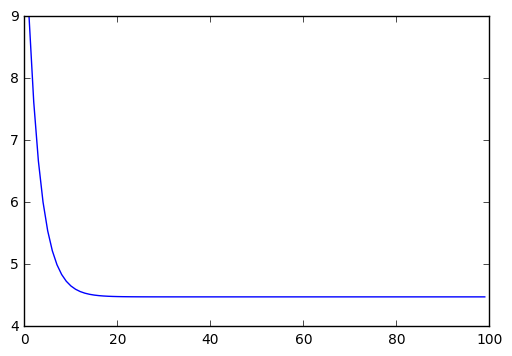

In [111]:
plt.plot(range(100), steps[:,2])
plt.ylim([4, 9])
plt.show()

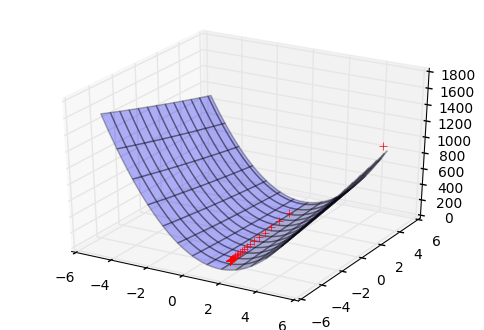

In [112]:
from matplotlib.animation import FuncAnimation
fig = plt.figure()
f = fig.add_subplot(111, projection='3d')
f.plot_surface(np.reshape(theta[:,0], (100,100)), np.reshape(theta[:,1], (100,100)), np.reshape(Losses, (100,100)), rstride=8, cstride=8, alpha=0.3)
f.plot(steps[:,0],steps[:,1],steps[:,2], 'r+')
plt.show()